Notebook to compare the efficiency of the naive decomposition / reconstruction algorithm and the efficiency of the optimized algorithm. At the end of this notebook we apply the optimized algorithm to the computation of the spectra of L. Leprince's forms.

In [1]:
import modules.MainFunctions as MF
import matplotlib.pyplot as plt
import numpy as np
from time import time
from tqdm import tqdm
import os

file_number=1

%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [99]:
# Run the algorithms and save the running times in a file
def test_perf(n,times,big_RY,dir_path,N,Lmax):
    path = dir_path+files[n]
    original_shape,N,b = MF.get_object_param(path)
    
    # Decomposition
    t = time()
    cr = MF.decompose(path,Lmax)
    times[n,0] = time()-t
    
    t = time()
    cr_perf = MF.decompose(path,Lmax,big_RY)
    times[n,1] = time()-t
    
    #assert(np.all(cr==cr_perf))
    
    pathSpec = "data/Test/test"
    np.save(pathSpec, cr)
    
    pathSpecPerf = "data/Test/test_perf"
    np.save(pathSpecPerf, cr_perf)
    
    # RY extraction
    t = time()
    RY = MF.extract_RY(big_RY,N,b)
    times[n,2] = time()-t
    
    # Reconstruction
    t = time()
    shape, border_re, border_im = MF.recompose(pathSpec+".npy",N,b,verbose=False)
    times[n,3] = time()-t
    
    t = time()
    shape_perf, border_re_perf, border_im_perf = MF.recompose(pathSpecPerf+".npy",N,b,RY,verbose=False)
    times[n,4] = time()-t
    
    #assert(np.all(shape==shape_perf))
    
    # Error
    t = time()
    err = MF.error(original_shape,shape)
    times[n,5] = time()-t
    
    err_perf = MF.error(original_shape,shape_perf)
    
    if err!=err_perf:
        print("WARNING : "+str(n)+" : "+str(err)+" : "+str(err_perf))

In [96]:
dir_path = "data/3DSyntheticForm/txt_angular/"
files = os.listdir(dir_path)
Nf =len(files)
N = 46
Lmax = 18
# 0: Decomposition
# 1: Optimized decomposition
# 2: RY extraction
# 3: Reconstruction
# 4: Optimized Reconstruction
# 5: Error computation
times = np.zeros((Nf,6))

In [97]:
t1 = time()
big_RY = MF.find_RY(N,Lmax)
t2 = time()
print(t2-t1)

Loading data/precomputedRY/RY_M_100_Lmax_18_.npy
9.596152305603027


In [ ]:
for n in tqdm(range(Nf),desc="Work in progress"):
    test_perf(n,times,big_RY,dir_path,N,Lmax)

In [74]:
np.save("data/Performances/3DSyntheticForm_txt_angular_times",times)

In [202]:
times = np.load("data/Performances/3DSyntheticForm_txt_angular_times.npy")
n = times.shape[0]
# Rows of the matrix times :
# 0: Decomposition
# 1: Optimized decomposition
# 2: RY extraction
# 3: Reconstruction
# 4: Optimized Reconstruction
# 5: Error computation
decomp = times[:,0]
opti_decomp = times[:,1]
RY_extraction = times[:,2]
recons = times[:,3]
opti_recons = times[:,4]
error = times[:,5]

m_decomp = np.mean(decomp)
m_opti_decomp = np.mean(opti_decomp)
m_RY_extraction = np.mean(RY_extraction)
m_recons = np.mean(recons)
m_opti_recons = np.mean(opti_recons)
m_error = np.mean(error)

<IPython.core.display.Javascript object>


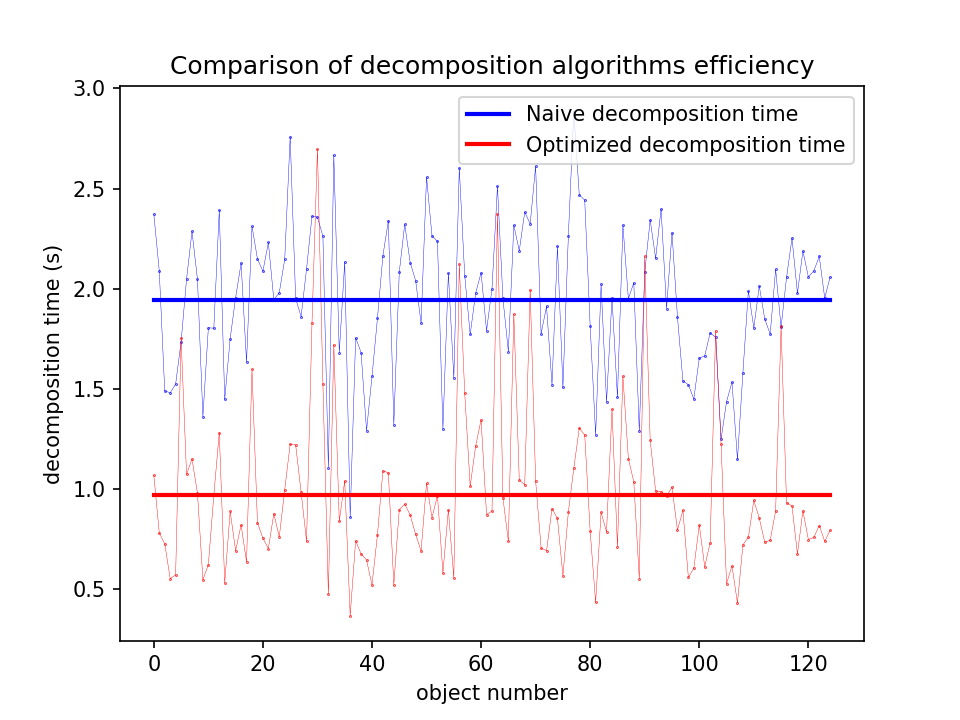

In [204]:
plt.figure()
plt.plot(decomp,color="blue",linewidth=0.2,marker="o",markersize=0.3)
plt.plot(opti_decomp,color="red",linewidth=0.2,marker="o",markersize=0.3)
plt.plot(m_decomp*np.ones(n),color="blue",linewidth=2,label="Naive decomposition time")
plt.plot(m_opti_decomp*np.ones(n),color="red",linewidth=2,label="Optimized decomposition time")
plt.xlabel("object number")
plt.ylabel("decomposition time (s)")
plt.yscale("linear")
plt.legend()
plt.title("Comparison of decomposition algorithms efficiency")
plt.show()

<IPython.core.display.Javascript object>


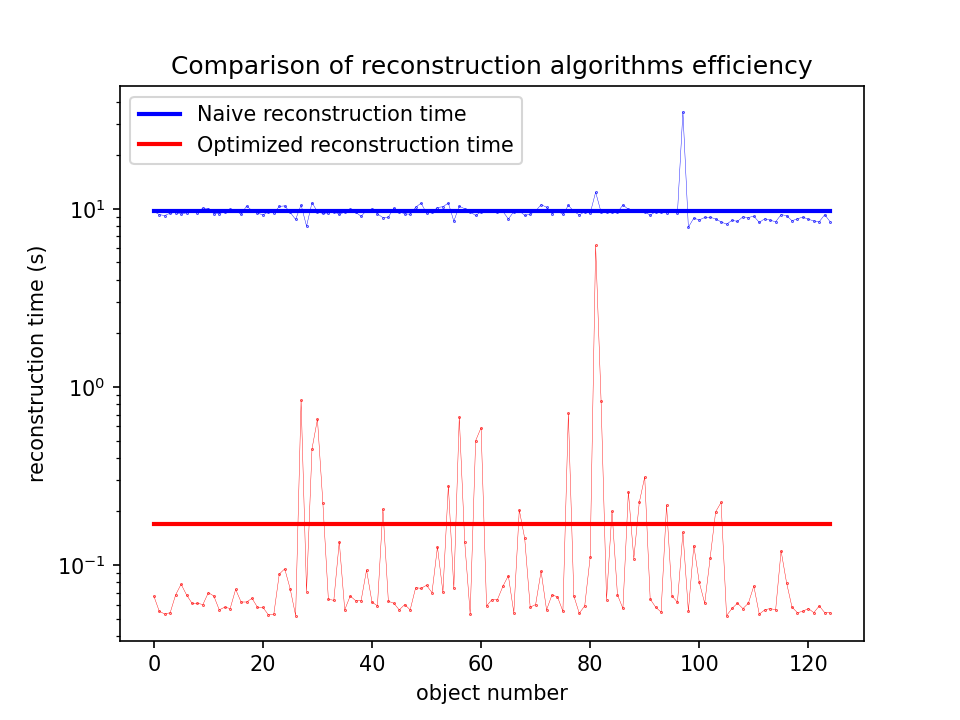

In [195]:
plt.figure()
plt.plot(recons,color="blue",linewidth=0.2,marker="o",markersize=0.3)
plt.plot(opti_recons,color="red",linewidth=0.2,marker="o",markersize=0.3)
plt.plot(m_recons*np.ones(n),color="blue",linewidth=2,label="Naive reconstruction time")
plt.plot(m_opti_recons*np.ones(n),color="red",linewidth=2,label="Optimized reconstruction time")
plt.xlabel("object number")
plt.ylabel("reconstruction time (s)")
plt.yscale("log")
plt.legend()
plt.title("Comparison of reconstruction algorithms efficiency")
plt.show()

From here, we compute and save the spectrum of the shapes of L. Leprince.

In [2]:
dir_path = "data/3DSyntheticForm/txt/"
files = os.listdir(dir_path)
Nf =len(files)
N = 46
Lmax = 5

In [3]:
big_RY = MF.find_RY(N,Lmax)

Loading data/precomputedRY/RY_M_100_Lmax_5_.npy


In [4]:
for n in tqdm(range(Nf),desc="Work in progress"):

    path = dir_path+files[n]
    original_shape,N,b = MF.get_object_param(path)
    
    # Decomposition
    cr = MF.decompose(path,Lmax,big_RY)
    
    pathSpec = "data/Test/test"
    np.save(pathSpec, cr)
    
    # RY extraction
    RY = MF.extract_RY(big_RY,N,b)
    
    # Reconstruction
    shape, border_re, border_im = MF.recompose(pathSpec+".npy",N,b,RY,verbose=False)
    
    # Error
    err = MF.error(original_shape,shape)

Work in progress:  71%|████████████████████████████████████████████▊                  | 96/135 [00:35<00:12,  3.05it/s]

Work in progress: 100%|██████████████████████████████████████████████████████████████| 135/135 [00:50<00:00,  2.70it/s]


In [5]:
dir_path = "data/3DSyntheticForm/txt/"
files = os.listdir(dir_path)
Nf =len(files)
N = 46
Lmax = 5

In [6]:
big_RY = MF.find_RY(N,Lmax)

Loading data/precomputedRY/RY_M_100_Lmax_5_.npy


In [7]:
for n in tqdm(range(Nf),desc="Work in progress"):

    path = dir_path+files[n]
    original_shape,N,b = MF.get_object_param(path)
    
    np.save("data/3DGeneratedForms/form_"+str(n+1)+"_",original_shape)
    
    # Decomposition
    cr = MF.decompose(path,Lmax,big_RY)
    
    pathSpec = "data/3DGeneratedSpectra/spec_"+str(n+1)+"_"
    np.save(pathSpec, cr)

Work in progress:  71%|████████████████████████████████████████████▊                  | 96/135 [00:31<00:11,  3.51it/s]

Work in progress: 100%|██████████████████████████████████████████████████████████████| 135/135 [00:44<00:00,  3.03it/s]


In [8]:
dir_path = "data/3DSyntheticForm/txt_angular/"
files = os.listdir(dir_path)
Nf =len(files)

for n in tqdm(range(Nf),desc="Work in progress"):

    path = dir_path+files[n]
    original_shape,N,b = MF.get_object_param(path)
    
    np.save("data/3DGeneratedForms/form_"+str(135+n+1)+"_",original_shape)
    
    # Decomposition
    cr = MF.decompose(path,Lmax,big_RY)
    
    pathSpec = "data/3DGeneratedSpectra/spec_"+str(135+n+1)+"_"
    np.save(pathSpec, cr)

Work in progress:   5%|███                                                             | 6/125 [00:01<00:31,  3.75it/s]

Work in progress:  83%|███████████████████████████████████████████████████▌          | 104/125 [00:31<00:05,  3.59it/s]

Work in progress:  84%|████████████████████████████████████████████████████          | 105/125 [00:31<00:05,  3.85it/s]

Work in progress:  93%|█████████████████████████████████████████████████████████▌    | 116/125 [00:35<00:02,  3.00it/s]

Work in progress: 100%|██████████████████████████████████████████████████████████████| 125/125 [00:38<00:00,  3.25it/s]
